### Feature Engineering and Exploratory Data Analysis
---

### Section

- [Import Libraries and Load Data](#Import-Libraries-and-Load-Data)
- [Feature Engineering](#Feature-Engineering)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)

#### Import Libraries and Data

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from chart_studio.plotly import plot_mpl
from datetime import timedelta
pd.set_option('display.max_rows', 2060)
pd.set_option('display.max_columns', 75)

In [156]:
# Import data from combined_clean csv
final_df = pd.read_csv(r'..\datasets\final_df.csv')
daily_df = pd.read_csv(r'..\datasets\final_df_2.csv')
# Set date as index and sort from oldest to latest 
final_df.set_index('date', inplace=True)
final_df.sort_index(inplace=True)

In [157]:
# Display the datasets
final_df.head()

,eur/usd,gbp/usd,usd/jpy,usd/chf,usd_index,wti_crude,snp_500,dow_jones,nasdaq,euro_n100,cac_40,dax,gold_usd,brent_crude,fed_rate,euro_libor,us_unemp,eu_unemp,us_retail,eu_retail,us_indus,eu_indus,us_core_cpi,eu_core_cpi,us_cpi,eu_cpi
date,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-01-31,1.159910,1.650562,113.334762,1.385376,94.583333,12.471429,1247.943810,9337.773333,2353.067619,1000.0,4137.265238,5147.515238,287.516667,11.051905,4.75,3.136190,4.3,10.1,6.6,1.8,3.7,1.0,2.4,1.4,1.7,0.8
1999-02-28,1.120615,1.627655,116.682500,1.427245,97.070000,11.988500,1246.346500,9320.539000,2354.832500,1000.0,4124.204500,4960.824500,287.757500,10.534500,4.75,3.093500,4.4,10.0,7.7,2.3,4.1,-1.1,2.1,1.3,1.6,0.8
1999-03-31,1.088370,1.621683,119.534783,1.462683,99.405217,14.682174,1281.663913,9753.632174,2391.140000,1000.0,4139.752174,4878.616522,285.934783,12.877391,4.75,3.048261,4.2,9.9,7.6,3.4,4.2,-0.5,2.1,1.3,1.7,1.0
1999-04-30,1.070041,1.608532,119.793182,1.494573,100.468182,17.286364,1334.137727,10415.725909,2538.894545,1000.0,4324.717273,5169.267273,282.563636,15.396364,4.75,2.696818,4.3,9.9,7.0,2.2,4.1,-0.4,2.2,1.2,2.3,1.1
1999-05-31,1.062510,1.614914,121.948095,1.508067,101.003333,17.702857,1330.273333,10847.598095,2507.806190,1000.0,4358.982381,5213.037143,276.761905,15.843333,4.75,2.580000,4.2,9.9,7.5,1.3,4.2,-0.9,2.0,1.2,2.1,1.0


In [158]:
# Check the column data types and shape of dataset
# No null values
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 1999-01-31 to 2019-12-31
Data columns (total 26 columns):
eur/usd        252 non-null float64
gbp/usd        252 non-null float64
usd/jpy        252 non-null float64
usd/chf        252 non-null float64
usd_index      252 non-null float64
wti_crude      252 non-null float64
snp_500        252 non-null float64
dow_jones      252 non-null float64
nasdaq         252 non-null float64
euro_n100      252 non-null float64
cac_40         252 non-null float64
dax            252 non-null float64
gold_usd       252 non-null float64
brent_crude    252 non-null float64
fed_rate       252 non-null float64
euro_libor     252 non-null float64
us_unemp       252 non-null float64
eu_unemp       252 non-null float64
us_retail      252 non-null float64
eu_retail      252 non-null float64
us_indus       252 non-null float64
eu_indus       252 non-null float64
us_core_cpi    252 non-null float64
eu_core_cpi    252 non-null float64
us_cpi         252 n

### Feature Engineering

In [159]:
# Create a column showing the percentage change in price from the previous week
final_df['percent_change'] = final_df['eur/usd'].pct_change()
final_df['percent_change'] = final_df['percent_change'].fillna(0)

In [160]:
# Add columns with year and month
final_df['Year'] = pd.DatetimeIndex(final_df.index).year
final_df['Month'] = pd.DatetimeIndex(final_df.index).month

### Exploratory Data Analysis

C:\Users\Roshrav\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Roshrav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


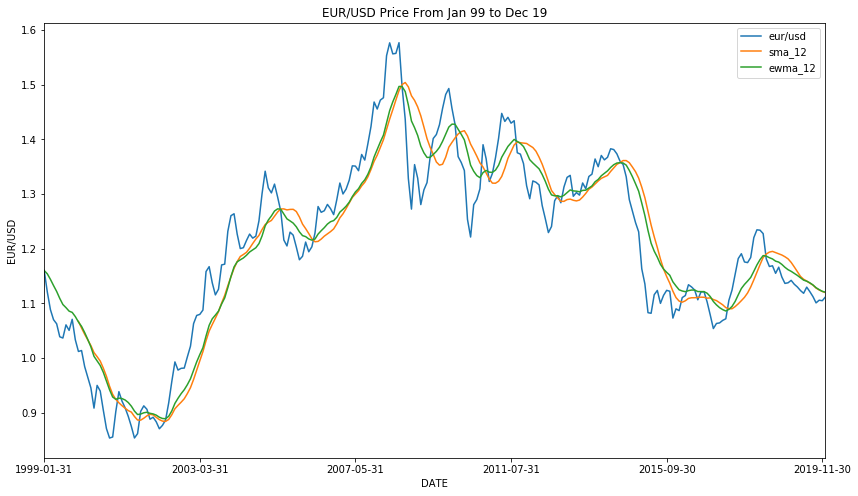

In [161]:
# Looking at monthly EUR/USD trend with SMA and EWMA (Exponentially-Weighted Moving Average)
# Dont see any stationarity in price
euro = final_df[['eur/usd']]
euro['sma_12'] = euro['eur/usd'].rolling(window=12).mean()
euro['ewma_12'] = euro['eur/usd'].ewm(span=12,adjust=False).mean()

title = 'EUR/USD Price From Jan 99 to Dec 19'
ylabel = 'EUR/USD'
xlabel = 'DATE'
ax = euro[['eur/usd', 'sma_12', 'ewma_12']].plot(figsize=(14,8), title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel = xlabel, ylabel = ylabel);

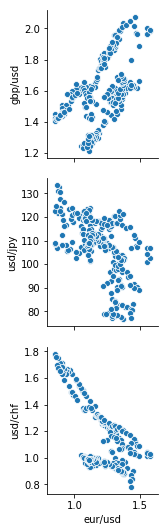

In [162]:
# Overview of the relationship between target variable EUR/USD and other currency pairs
sns.pairplot(final_df, y_vars = ['gbp/usd', 'usd/jpy', 'usd/chf'], 
             x_vars= ['eur/usd'])

- Looking at the pairplots above we can see a positive correlation between eur/usd and gbp/usd
- While usd/chf looks to have a negative correlation with eur/usd, this would be normal as Swiss francs is traded as Quote currency and Euro as base currency to the US dollar.
- We also notice a slight negative correlation between usd/jpy and eur/usd, similar to Swiss francs Japanese yen is traded as Quote currency to US dollar. And also usd/jpy is viewed as a safe haven currency pair hence whenever there's a crisis, investors tend reduce their position in other currencies and park them in usd/jpy.

In [163]:
# Check the correlation between target variable EUR/USD and other features 
euro_matrix = np.abs(final_df.corr())
print(euro_matrix['eur/usd'].sort_values(ascending=False))

eur/usd           1.000000
usd_index         0.982777
wti_crude         0.817278
brent_crude       0.774369
usd/chf           0.684253
usd/jpy           0.583293
gbp/usd           0.548545
eu_retail         0.546600
us_unemp          0.543583
gold_usd          0.478897
fed_rate          0.362886
us_core_cpi       0.357948
cac_40            0.322567
euro_n100         0.319324
Year              0.307652
eu_unemp          0.176995
us_retail         0.159613
nasdaq            0.155055
euro_libor        0.146824
eu_indus          0.127009
snp_500           0.121116
percent_change    0.086853
eu_cpi            0.084365
us_cpi            0.060061
eu_core_cpi       0.053715
dow_jones         0.049739
dax               0.036583
us_indus          0.030746
Month             0.005121
Name: eur/usd, dtype: float64


In [164]:
# Will drop features that have p values of 0.10 and below with eur/usd, as it wont affect their movement
final_df.drop(['Month','us_indus', 'dax', 'dow_jones', 'eu_core_cpi', 'us_cpi', 'eu_cpi', 'percent_change', 'eu_indus'], 
              axis = 1, inplace= True)

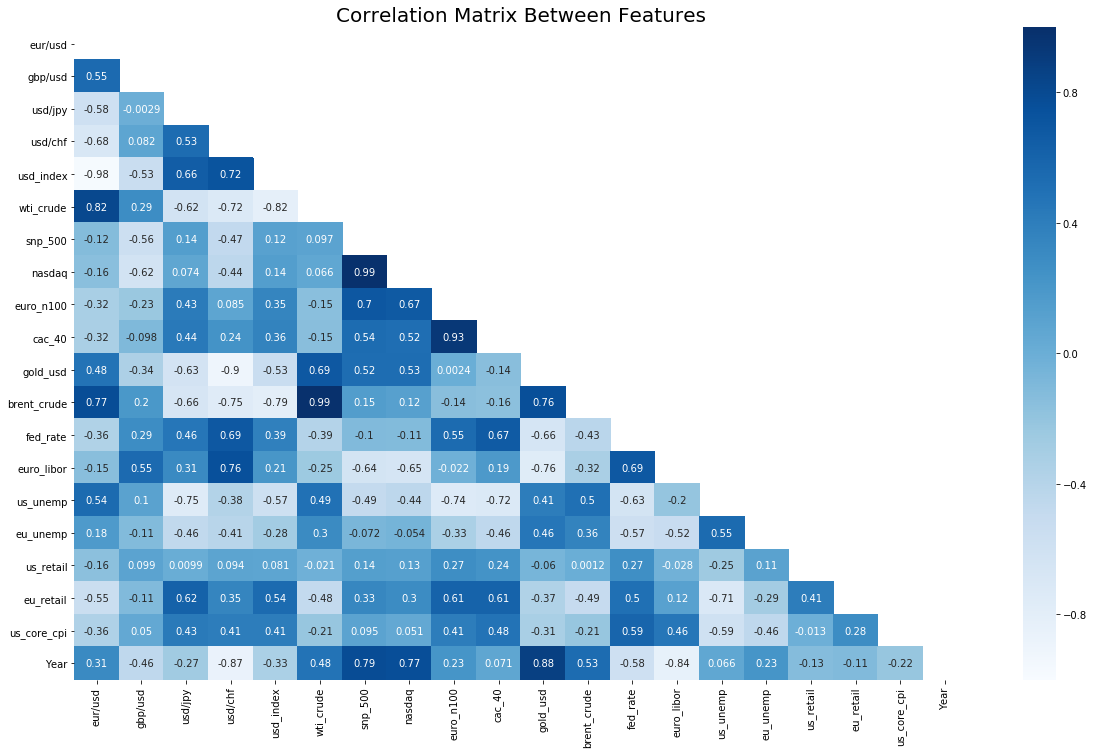

In [165]:
# Check the correlation matrix across the dataset, drop features that are highly correlated
# Setting up the size of the figure
plt.figure(figsize=(20,12)) 
# Insert the title 
plt.title("Correlation Matrix Between Features", fontsize=20) 
corr = final_df.corr()
# Set up mask to be True to hide upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heat_map = sns.heatmap(corr,mask=mask,annot=True,vmin=-1,vmax=1,cmap="Blues")

- Notice quite a few features with high collinearity in the above matrix (p value > 0.90), to avoid multicollinearity will drop those features.
- Will decide which feature to drop by comparing their score against the target variable 'eur/usd'.

In [166]:
# There's a high collinearity between brent and wti, will keep wti and drop brent
# Notice high collinearity between us and eu equity indices as well, will keep nasdaq and cac_40 and drop the rest
final_df.drop(['snp_500', 'brent_crude', 'euro_n100'], axis = 1, inplace= True)

In [167]:
# Load daily data set
daily_df.drop(['Unnamed: 0'], axis = 1, inplace= True)
daily_df['date'] = pd.to_datetime(daily_df['date'])
daily_df.set_index('date', inplace=True)
daily_df.sort_index(inplace=True)

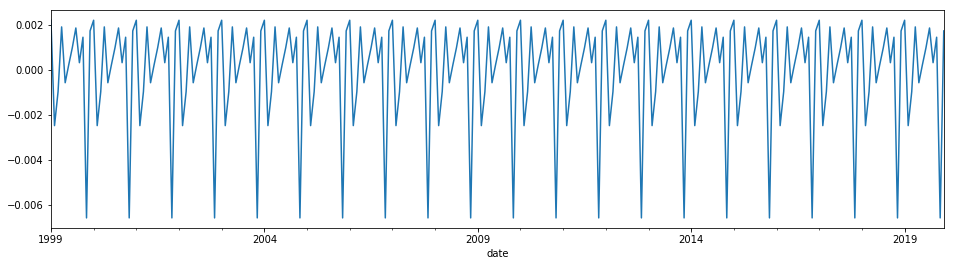

In [168]:
# Run an ETS Decomposition to view Seasonality of monthly dataset
euro = daily_df['eur/usd'].resample('M').mean()
result = seasonal_decompose(euro)
result.seasonal.plot(figsize=(16,4));

- Notice there's slight seasonality present, in the ETS Decomposition above.
- Will double check against the ACF and PACF plots to confirm.

In [169]:
# Save final_df to csv
final_df.to_csv(r'..\datasets\final_df_3.csv', index='date')